## Gradient Descent for multiple variable linear regression
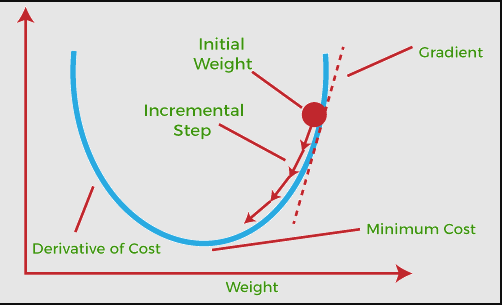

In [1]:
#Add the folder where the functions for gradient descent are implemented
import sys
sys.path.insert(1, '../src')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

I build an example with 10 points to check how the code works. As I built the code to work for an arbitrary number of features, it expects the points X to be a matrix of shape (m,n) where m is the number of points, n is the number of features. When I have only one feature, I must put the values in tuples like (x,).

In [3]:
X = np.array(((1,),(2,),(3,), (4,), (5,), (6,), (7,), (8,), (9,)))
y = np.array([1,1.5,3.5, 3, 4.2, 5.1, 5.0, 6.4, 7.1])
w= 0 
b= 0

Evaluating the values of w and b at the minimum of the cost function, using the gradient_descent 

In [4]:
w_res, b_res, cost_history, param_history = gradient_descent(X,y,w,b,0.001)

print(w_res, b_res)

Tolerance reached at iteration:  33981
[0.73666671] 0.4055553122372844


Let's solve the same problem analytically, using the normal equation.

- Suppose I have m training examples (points): ($X_{i}$, $y_{i}$)
- Suppose that I have n features $X_{i} = (X_{i1}, X_{i2}, ..., X_{in}) \in \mathbb{R}^n$ 
- Suppose that I have a linear regression model, described by    $$y = wx + b $$
- I can rewrite that equation in matrix form:

 $$ 
  \vec{y} =
  \left[ {\begin{array}{c}
    y_{1}  \\
    \vdots  \\
    y_{m} \\
  \end{array} } \right]
$$

 $$ 
  X =
  \left[ {\begin{array}{cccc}
    X_{11} & \cdots & X_{1n} & 1\\
    \vdots & \ddots & \ddots & 1\\
    X_{m1} & \cdots & X_{mn} & 1\\
  \end{array} } \right]
$$

 $$ 
  \vec{w} =
  \left[ {\begin{array}{c}
    w_{1}  \\
    \vdots  \\
    w_{n} \\
    b
  \end{array} } \right]
$$
We can convince ourselves that the original equation can be rewritten as: $$ \vec{y} = X\vec{w} $$
Solving the system with the normal equation:

- If $m>n$ , this system of equations for $\vec{w}$ doesn't have a solution in general. For example if we consider just 2 parameters (w, b), if we have more than 2 points ($X_{i}, y_{i}$), there is no straight line passing for all the points (unless they are linearly dependent, i.e. they are on a straight line).

- What we can do is to find the solution that best fits the points. To do that, we define the error $J = \frac{1}{m} \sum_{i=0}^m (y_{i} - X_{i}\vec{w})^2$ which we try to minimize with respect to the parameters $\vec{w}$.

The solution to this problem is: $$ w = (X^{T} X)^{-1} X^T y$$

Clicking on the following image you will be redirected to a lesson on normal equation by Andrew Ng

[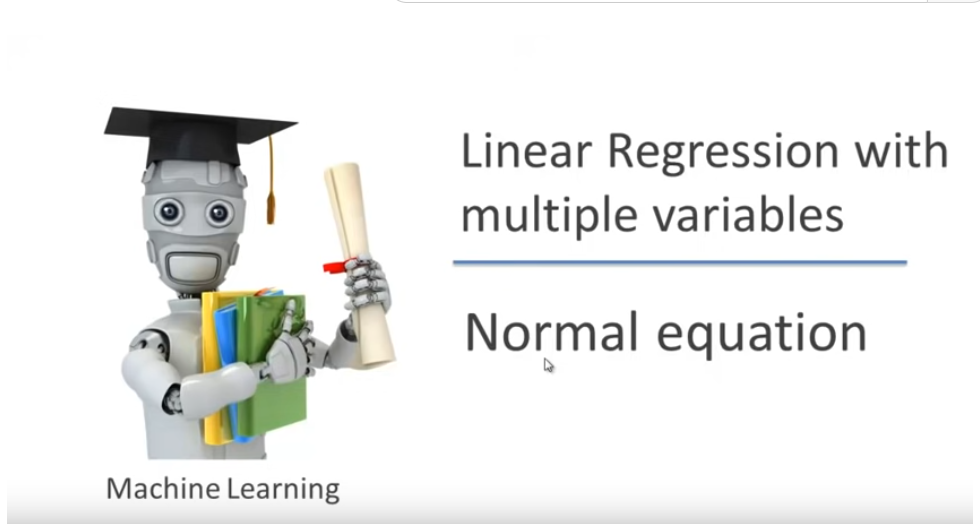](https://www.youtube.com/watch?v=B-Ks01zR4HY&t=600s)

In [5]:
X_new = np.array([np.append(x,1) for x in X])
w_nor = np.linalg.inv(np.dot(X_new.T,X_new)).dot(X_new.T).dot(y)

print(w_nor)

[0.73666667 0.40555556]


Let's solve the same problem using the library sklearn

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = np.array(((1,),(2,),(3,), (4,), (5,), (6,), (7,), (8,), (9,)))
y = np.array([1,1.5,3.5, 3, 4.2, 5.1, 5.0, 6.4, 7.1])

lm.fit(X, y)

print(lm.coef_, lm.intercept_)

[0.73666667] 0.4055555555555559


Comparison of the results. What I obtain with the three methods is equivalent!

In [7]:
print(f"With gradient descent I obtain: {w_res[0], b_res}")
print(f"With the normal equation I obtain: {w_nor}")
print(f"With sklearn I obtain: {lm.coef_[0], lm.intercept_}")

With gradient descent I obtain: (0.7366667053361302, 0.4055553122372844)
With the normal equation I obtain: [0.73666667 0.40555556]
With sklearn I obtain: (0.7366666666666667, 0.4055555555555559)


I create a dataframe with the history of the cost function and the parameters obtained at each iteration

In [8]:
import pandas as pd

df_cost_param = pd.DataFrame({"cost" : cost_history,
                              "w" : [p[0][0] for p in param_history],
                              "b" : [p[1] for p in param_history]})


df_cost_param

,cost,w,b
0,20.502222,[0],0.000000
1,17.949378,0.050711,0.008178
2,15.717246,0.098129,0.015832
3,13.765536,0.142467,0.022997
4,12.059018,0.183925,0.029704
...,...,...,...
9996,0.165363,0.737403,0.400923
9997,0.165363,0.737403,0.400925
9998,0.165363,0.737402,0.400927
9999,0.165363,0.737402,0.400929


I create a dataframe with the points X and y

In [9]:
import pandas as pd
df = pd.DataFrame({"x" : [x[0] for x in X], "y" : y})
df["lin_regr"] = w_res * df["x"] + b_res
df["nor_eq"] = w_nor[0] * df["x"] + w_nor[1]

df

,x,y,lin_regr,nor_eq
0,1,1.0,1.142222,1.142222
1,2,1.5,1.878889,1.878889
2,3,3.5,2.615555,2.615556
3,4,3.0,3.352222,3.352222
4,5,4.2,4.088889,4.088889
5,6,5.1,4.825556,4.825556
6,7,5.0,5.562222,5.562222
7,8,6.4,6.298889,6.298889
8,9,7.1,7.035556,7.035556


I create frame images of the first 100 iterations, to create a gif 

In [10]:
#No need to run this cell if the gif already exist
create_gif(df_cost_param, df, num_frames =100, fps = 8)

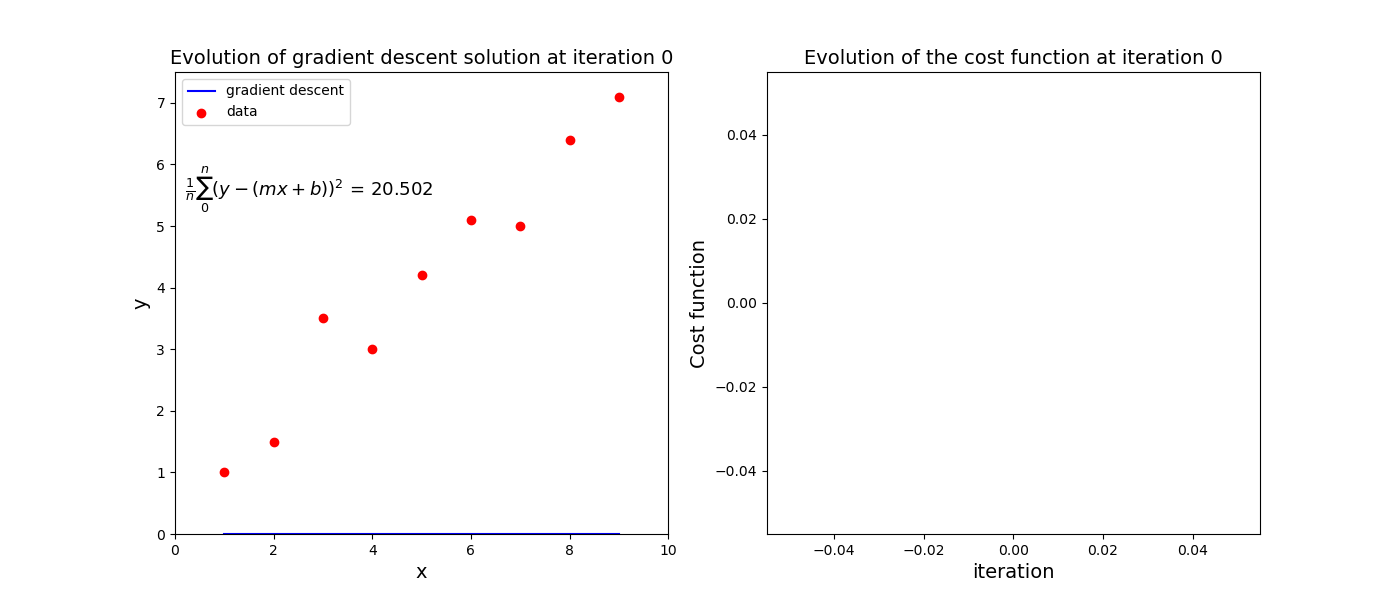

In [25]:
from IPython.display import Image
Image(filename='../img/gradientDescent.gif') 

Let's look at the case with 2 weights w and 1 bias b

In [12]:
X = np.array(((1,2),(2,3),(3,1), (4,5), (5,6), (6,3), (7,5), (8,7), (9,8)))
y = np.array([1,1.5,3.5, 3, 4.2, 5.1, 5.0, 6.4, 7.1])
w= np.array([0,0]) 
b= 0
print(gradient(X,y,w,b))

(array([-50.71111111, -42.68888889]), -8.177777777777779)


In [13]:
w_res, b_res, cost_history, param_history = gradient_descent(X,y,w,b,0.001)

print(w_res, b_res)

Tolerance reached at iteration:  38902
[ 0.84980012 -0.16161916] 0.5581956332849191


In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = np.array(((1,2),(2,3),(3,1), (4,5), (5,6), (6,3), (7,5), (8,7), (9,8)))
y = np.array([1,1.5,3.5, 3, 4.2, 5.1, 5.0, 6.4, 7.1])

lm.fit(X, y)

print(lm.coef_, lm.intercept_)

[ 0.8498001  -0.16161919] 0.5581959020489755


In [15]:
X_new = np.array([np.append(x,1) for x in X])
w_nor = np.linalg.inv(np.dot(X_new.T,X_new)).dot(X_new.T).dot(y)

print(w_nor)

[ 0.8498001  -0.16161919  0.5581959 ]


Let's try to use more fake data. We will use random points which are approximately on a straight line that we decide.

 I will choose $y = 4x + 8.5$ as an example, and I extract my random points with a normal distribution of sigma=15 around the line.

In [16]:
X = np.linspace(0,10, 1000)
#for gradient descent
X1 = np.array([(x,) for x in X])
#for the analytic solution
X2= np.array([(x,1) for x in X])

sigma = 15
y = [sigma*np.random.randn() + 4*x + 8.5 for x in X]

(0.0, 10.0)

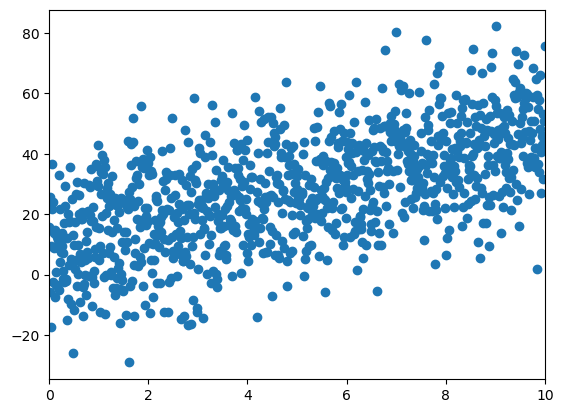

In [17]:
plt.scatter(X,y)
plt.xlim(0,10)

In [18]:
w_in = 0
b_in = 0

w_res2, b_res2, cost_history2, param_history2 = gradient_descent(X1, y, w_in, b_in, 1e-2)

print(w_res2, b_res2)

Tolerance reached at iteration:  4030
[3.84331134] 8.696044989248282


In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1, y)

print(lm.coef_, lm.intercept_)

[3.84331134] 8.696045009489353


In [20]:
w_nor = np.linalg.inv(np.dot(X2.T,X2)).dot(X2.T).dot(y)

print(w_nor)

[3.84331134 8.69604501]


If I have very high numbers, the gradients can explode. I tried to put clipping values for the gradient, but it doesn't seem to work fine by itself.

To solve this, it is useful to normalize the data with the maximum value of X.

In [21]:
X = np.linspace(0,10000, 1000)


sigma = 15
intercept = 3.5
coef = 2
y = np.array([sigma*np.random.randn() + coef*x for x in X])

#Normalize X
max = X.max()
X = X/max

#for gradient descent
X1 = np.array([(x,) for x in X])
#for the analytic solution
X2= np.array([(x,1) for x in X])

#Normalize y and add intercept
y = y/max + intercept



(0.0, 1.0)

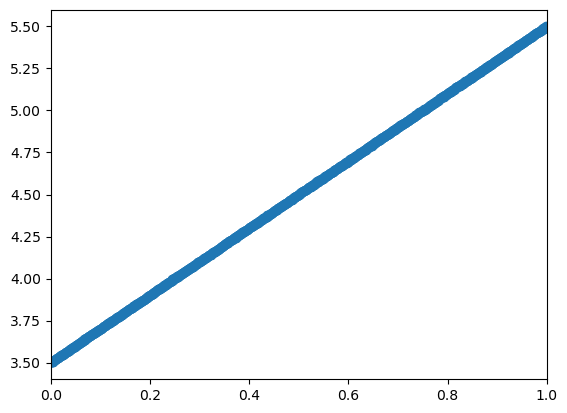

In [22]:
plt.scatter(X,y)
plt.xlim(0,1)

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1, y)

print(lm.coef_, lm.intercept_)

[1.99988904] 3.4999836776986943


In [24]:
w_in = 0
b_in = 0

w_res2, b_res2, cost_history2, param_history2 = gradient_descent(X1, y, w_in, b_in, 1e-2)

print(w_res2, b_res2)

Tolerance reached at iteration:  10677
[1.99988896] 3.4999837182295135
